# Analysis of Linear ODE Systems $\dot{\mathbf{x}} = A\mathbf{x}$ using Modal Decomposition

This notebook systematically analyzes and solves linear systems for the five basic topological classifications of phase portraits (in Czech):
1.  **Sedlo** (Saddle Point)
2.  **Uzel** (Node)
3.  **Střed** (Center)
4.  **Ohnisko** (Focus)
5.  **Osnova** (Star Node)

For each case, we will:
*   Define the matrix $A$.
*   Find eigenvalues and eigenvectors (Modal Decomposition).
*   Construct the general solution.
*   Plot the phase portrait.

## 2. Define Universal Analysis Function

A helper function to solving the system using SymPy (Modal Decomposition) and plotting the result.

Solution form: $\mathbf{x}(t) = c_1 e^{\lambda_1 t} \mathbf{v}_1 + c_2 e^{\lambda_2 t} \mathbf{v}_2$ (for distinct real eigenvalues).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Enable pretty printing for SymPy
sp.init_printing(use_latex="mathjax")


# Define plotting helper function logic
def plot_phase_portrait(A_num, title, ax, range_lim=4):
    x_vals = np.linspace(-range_lim, range_lim, 20)
    y_vals = np.linspace(-range_lim, range_lim, 20)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Calculate derivatives
    # dx = a11*x + a12*y
    # dy = a21*x + a22*y
    DX = A_num[0, 0] * X + A_num[0, 1] * Y
    DY = A_num[1, 0] * X + A_num[1, 1] * Y

    ax.streamplot(X, Y, DX, DY, color="blue", density=1.2, arrowsize=1.5, linewidth=0.8)

    # Plot Nullclines if needed (optional, kept simple here to focus on topology)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.set_aspect("equal")
    ax.set_xlim(-range_lim, range_lim)
    ax.set_ylim(-range_lim, range_lim)

In [3]:
def analyze_system(A_matrix, title_czech):
    print(f"--- Analysis for: {title_czech} ---")

    t = sp.symbols("t", real=True)

    # 1. Eigenvalues and Eigenvectors
    eigen_info = A_matrix.eigenvects()

    print("Eigenvalues and Eigenvectors:")
    for val, mult, vecs in eigen_info:
        display(val)
        for vec in vecs:
            display(vec)

    # 2. General Solution (Symbolic display only for understanding)
    print("General Modal Solution Structure:")
    # Note: Full generic construction handles complex/repeated cases automatically is complex.
    # Here we show the decomposition components.

    # 3. Plotting
    A_np = np.array(A_matrix.tolist()).astype(float)

    fig, ax = plt.subplots(figsize=(6, 6))
    plot_phase_portrait(A_np, title_czech, ax)
    plt.show()

## 3. Case 1: Sedlo (Saddle Point)
Eigenvalues represent real numbers with opposite signs ($\lambda_1 > 0, \lambda_2 < 0$).
Example:
$$ A = \begin{pmatrix} 1 & 0 \\ 0 & -2 \end{pmatrix} $$

--- Analysis for: Sedlo (Saddle Point) ---
Eigenvalues and Eigenvectors:


-2

⎡0⎤
⎢ ⎥
⎣1⎦

1

⎡1⎤
⎢ ⎥
⎣0⎦

General Modal Solution Structure:


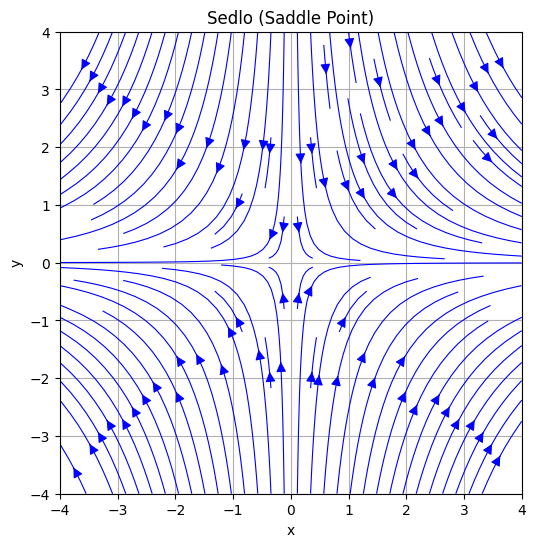

In [4]:
A_saddle = sp.Matrix([[1, 0], [0, -2]])
analyze_system(A_saddle, "Sedlo (Saddle Point)")

## 4. Case 2: Uzel (Stable/Unstable Node)
Eigenvalues are real distinct numbers with the same sign.
Example (Stable Node): $\lambda_1 = -1, \lambda_2 = -3$
$$ A = \begin{pmatrix} -1 & 0 \\ 0 & -3 \end{pmatrix} $$

--- Analysis for: Stabilní Uzel (Stable Node) ---
Eigenvalues and Eigenvectors:


-3

⎡0⎤
⎢ ⎥
⎣1⎦

-1

⎡1⎤
⎢ ⎥
⎣0⎦

General Modal Solution Structure:


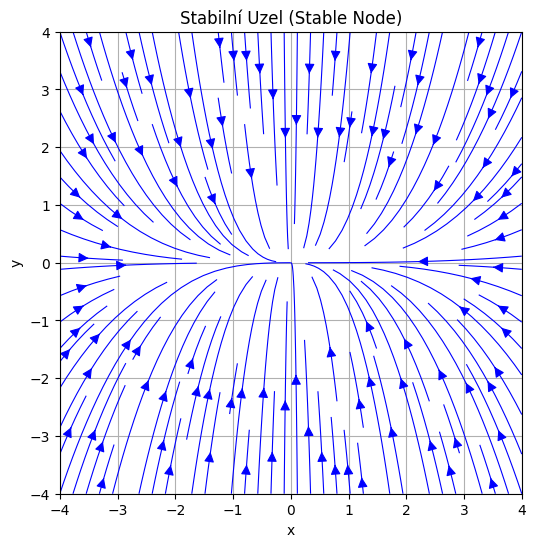

In [5]:
A_node = sp.Matrix([[-1, 0], [0, -3]])
analyze_system(A_node, "Stabilní Uzel (Stable Node)")

## 5. Case 3: Střed (Center)
Eigenvalues are purely imaginary ($\lambda = \pm i\beta$).
Example:
$$ A = \begin{pmatrix} 0 & 1 \\ -4 & 0 \end{pmatrix} $$
Eigenvalues: $\lambda^2 = -4 \Rightarrow \lambda = \pm 2i$

--- Analysis for: Střed (Center) ---
Eigenvalues and Eigenvectors:


-2⋅ⅈ

⎡ⅈ⎤
⎢─⎥
⎢2⎥
⎢ ⎥
⎣1⎦

2⋅ⅈ

⎡-ⅈ ⎤
⎢───⎥
⎢ 2 ⎥
⎢   ⎥
⎣ 1 ⎦

General Modal Solution Structure:


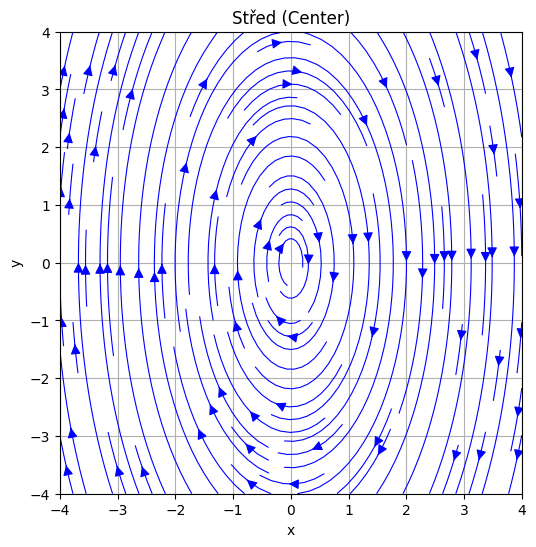

In [6]:
A_center = sp.Matrix([[0, 1], [-4, 0]])
analyze_system(A_center, "Střed (Center)")

## 6. Case 4: Ohnisko (Focus / Spiral)
Eigenvalues are complex conjugates with non-zero real part ($\lambda = \alpha \pm i\beta$).
Example (Stable Focus): $\alpha < 0$.
$$ A = \begin{pmatrix} -1 & -1 \\ 1 & -1 \end{pmatrix} $$
Eigenvalues: $\lambda = -1 \pm i$

--- Analysis for: Stabilní Ohnisko (Stable Focus) ---
Eigenvalues and Eigenvectors:


-1 - ⅈ

⎡-ⅈ⎤
⎢  ⎥
⎣1 ⎦

-1 + ⅈ

⎡ⅈ⎤
⎢ ⎥
⎣1⎦

General Modal Solution Structure:


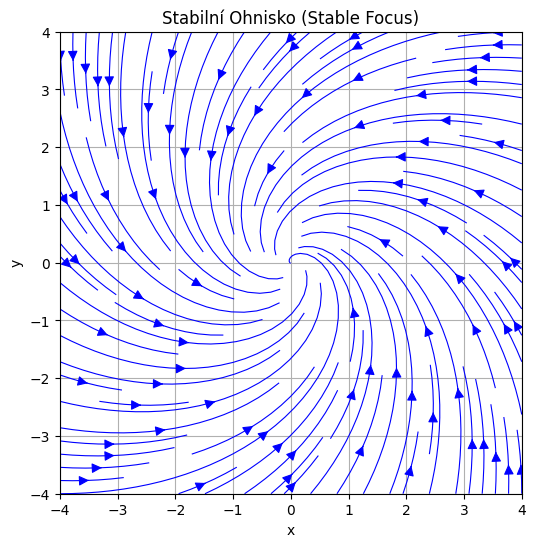

In [7]:
A_focus = sp.Matrix([[-1, -1], [1, -1]])
analyze_system(A_focus, "Stabilní Ohnisko (Stable Focus)")

## 7. Case 5: Osnova (Star Node)
Repeated real eigenvalues with two independent eigenvectors (proportional to Identity matrix).
$$ A = \begin{pmatrix} -2 & 0 \\ 0 & -2 \end{pmatrix} $$

--- Analysis for: Osnova (Star Node) ---
Eigenvalues and Eigenvectors:


-2

⎡1⎤
⎢ ⎥
⎣0⎦

⎡0⎤
⎢ ⎥
⎣1⎦

General Modal Solution Structure:


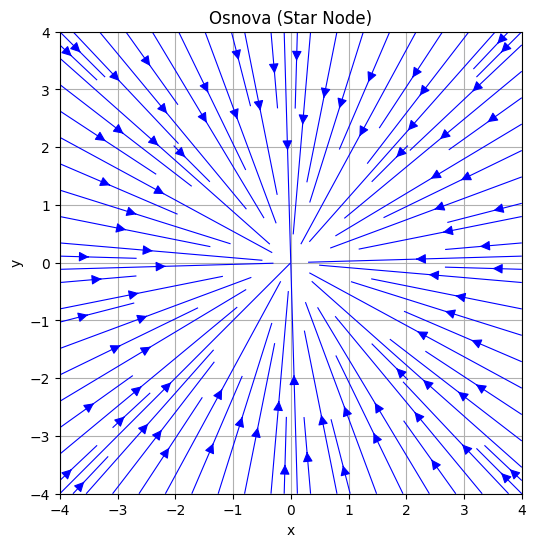

In [8]:
A_star = sp.Matrix([[-2, 0], [0, -2]])
analyze_system(A_star, "Osnova (Star Node)")